<a href="https://colab.research.google.com/github/duc-ke/study-book-keras_with_blocks/blob/master/4_image_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generator의 Augmentation 기능을 이용하여 도형그림 사진 분류 정확도 향상 시키기 

## 시도1. 깔끔한 train 데이터로 학습한 모델을 예외가 많은 test set을 얻어 평가 해본다.
결과가 안좋다. train에만 오버피팅



In [1]:
!git clone https://github.com/duc-ke/study-book-keras_with_blocks.git
%run study-book-keras_with_blocks/0_custom_libraries.ipynb

Cloning into 'study-book-keras_with_blocks'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 178 (delta 74), reused 151 (delta 61), pack-reused 0
Receiving objects: 100% (178/178), 255.68 KiB | 1.89 MiB/s, done.
Resolving deltas: 100% (74/74), done.


Using TensorFlow backend.


In [0]:
path = 'study-book-keras_with_blocks/dataset/handwriting_shape/train/triangle/triangle001.png'

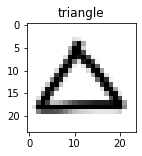

In [3]:
img_show(path, name='triangle')

In [0]:
path = 'study-book-keras_with_blocks/dataset\
/hard_handwriting_shape/test/triangle/tri_0_1137.png'

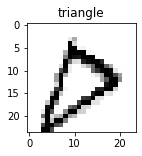

In [5]:
img_show(path, name='triangle')

너무 깨끗한 데이터만 학습시켜서 악필로 테스트 하면 예외가 많이 나올 것이라고 판단됨.

In [0]:
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

import numpy as np

In [0]:
np.random.seed(3)

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'study-book-keras_with_blocks/dataset/handwriting_shape/train/',
    target_size=(24, 24),
    class_mode='categorical',
    batch_size=3
)

Found 45 images belonging to 3 classes.


In [9]:
# train 데이터 갯수
train_generator.samples

45

In [0]:
test_dataset = ImageDataGenerator(rescale=1./255)

In [11]:
test_generator = test_dataset.flow_from_directory(
    'study-book-keras_with_blocks/dataset/hard_handwriting_shape/test/',
    target_size=(24, 24),
    class_mode='categorical',
    batch_size=3    
)

Found 15 images belonging to 3 classes.


In [12]:
test_generator.samples

15

In [0]:
class CNN(Sequential):
  def __init__(self):
    super().__init__()
    self.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24, 24, 3)))
    self.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    self.add(MaxPooling2D(pool_size=(2, 2)))
    self.add(Flatten())

    self.add(Dense(128, activation='relu'))
    self.add(Dense(3, activation='softmax'))

    self.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model = CNN()

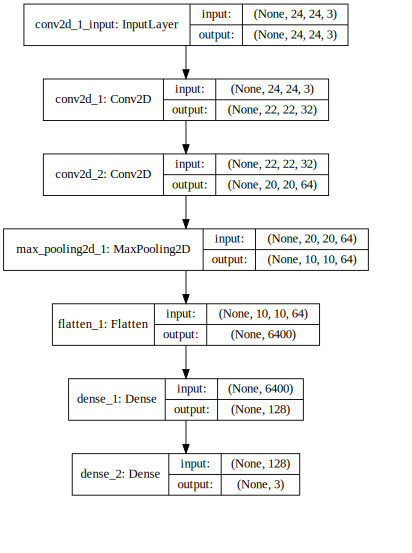

In [15]:
visualize_model(model)

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=45/3,
    epochs=50,
    validation_data=test_generator,
    validation_steps= 15/3
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/50





15/15 [==============================] - 14s 934ms/step - loss: 0.9762 - acc: 0.6000 - val_loss: 1.4127 - val_acc: 0.4000
Epoch 2/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1878 - acc: 0.9556 - val_loss: 1.8957 - val_acc: 0.6000
Epoch 3/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0147 - acc: 1.0000 - val_loss: 2.8728 - val_acc: 0.6000
Epoch 4/50
15/15 [==============================] - 0s 8ms/step - loss: 0.0032 - acc: 1.0000 - val_loss: 3.2023 - val_acc: 0.6000
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 3.3365 - val_acc: 0.5333
Epoch 6/50
15/15 [==============================] - 0s 10ms/step - loss: 3.5113e-04 - acc: 1.0000 - val_loss: 3.4586 - val_acc: 0.6000
Epoch 7/50
15/15 [==============================] - 0s 9ms/step - loss: 1.8344e-04 - acc: 1.0000 - val_loss: 3

In [17]:
evaluation = model.evaluate(test_generator, steps=15/3)
print(evaluation)

5/5 [==============================] - 0s 3ms/step
[4.716638562594744, 0.5333333373069763]


validation에서 정확도가 0.5 밖에 안나옴. 그런데 train에선 정확도가 1까지나 됨. 결국 overfitting 모델임을 알 수 있음

In [18]:
output = model.predict_generator(
    test_generator,
    steps=5
)

print(test_generator.class_indices)
print(output)
output_onlyclass = np.argmax(output, axis=1)
print(output_onlyclass)

{'circle': 0, 'rectangle': 1, 'triangle': 2}
[[3.40829570e-06 1.66499376e-05 9.99979973e-01]
 [3.63452806e-08 9.24670758e-08 9.99999881e-01]
 [3.34509388e-02 9.11053598e-01 5.54954372e-02]
 [1.17494527e-03 7.64888773e-06 9.98817384e-01]
 [1.15615606e-09 5.29118402e-08 1.00000000e+00]
 [2.07742420e-03 1.05858322e-04 9.97816682e-01]
 [4.19618118e-06 1.13935421e-05 9.99984384e-01]
 [1.38896048e-05 1.57054586e-07 9.99985933e-01]
 [2.12665732e-10 6.85129820e-08 9.99999881e-01]
 [1.50348172e-01 7.74943113e-01 7.47086629e-02]
 [9.99996305e-01 3.18461321e-06 5.06252150e-07]
 [9.23216021e-07 1.62690458e-06 9.99997497e-01]
 [1.18008196e-04 2.58571744e-01 7.41310298e-01]
 [4.62757407e-06 4.95340601e-06 9.99990463e-01]
 [4.90101274e-06 4.41013093e-08 9.99995112e-01]]
[2 2 1 2 2 2 2 2 2 1 0 2 2 2 2]


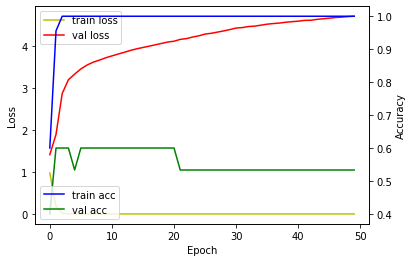

In [19]:
plot_accloss(history)

In [20]:
np.set_printoptions(formatter={'float': lambda x: '{:0.3f}'.format(x)})
output

array([[0.001, 0.000, 0.999],
       [0.002, 0.000, 0.998],
       [0.000, 0.000, 1.000],
       [0.000, 0.000, 1.000],
       [0.092, 0.777, 0.131],
       [0.000, 0.000, 1.000],
       [0.000, 0.184, 0.816],
       [0.000, 0.000, 1.000],
       [1.000, 0.000, 0.000],
       [0.000, 0.000, 1.000],
       [0.000, 0.000, 1.000],
       [0.000, 0.000, 1.000],
       [0.000, 0.000, 1.000],
       [0.072, 0.851, 0.077],
       [0.000, 0.000, 1.000]], dtype=float32)

## Augmentation 샘플데이터 생성 및 저장.
keras에서 제공하는 augmentation 라이브러리는 데이터를 생성하지 않고 내부적으로만 가지고 저장하게 됨. augmentation이 잘 만들어지는지 확인하기 위해서 샘플데이터를 생성하는 코드가 필요 함.

In [0]:
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import numpy as np
import os
import shutil

In [0]:
np.random.seed(5)

data_aug_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,    # 원본이미지 회전 최대 각도
    width_shift_range=0.2,    # 0~1사이, 전체 넓이의 비율(단위: pixcel)
    height_shift_range=0.2,
    shear_range=0.7,    # 이미지 뭉게기, 
    zoom_range=[0.9, 2.2],    # [lower, upper] 비율로 확대
    horizontal_flip=True,    # 수평뒤집기
    vertical_flip=True,    # 수직뒤집기
)

In [68]:
origin_path = 'study-book-keras_with_blocks/dataset \
/handwriting_shape/train/triangle/triangle001.png'
dirname = 'augment_sample'

make_dir(dirname)
shutil.copy(origin_path, dirname+'/origin_tri.png')

((24, 24, 3), numpy.ndarray)

In [0]:
# 파일 읽는 법 1.
sample_img = load_img(origin_path)
x = img_to_array(sample_img)
x.shape, type(x)

In [69]:
# 파일 읽는 법 2.
test = cv2.imread(origin_path).astype('float32')
type(test)

numpy.ndarray

In [38]:
(1,) + x.shape

(1, 24, 24, 3)

In [39]:
x2 = x.reshape((1, ) + x.shape)
x2.shape

(1, 24, 24, 3)

In [40]:
x2

array([[[[255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         ...,
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000]],

        [[255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         ...,
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000]],

        [[255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         ...,
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000]],

        ...,

        [[255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         ...,
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000],
         [255.000, 255.000, 255.000]],

        [[

In [0]:
i = 0

# 아래 for는 무한으로 반복됨. 원하는 수가 되면 break가 필수
for batch in data_aug_gen.flow(x2, batch_size=1, save_to_dir='augment_sample', save_prefix='tri', save_format='png'):
  i += 1
  if i > 30:
    break

#### 파일 브라우저로 바로다운

In [0]:
from google.colab import files

In [71]:
!zip -r augment_sample.zip augment_sample
files.download('augment_sample.zip')

updating: augment_sample/ (stored 0%)
updating: augment_sample/tri_0_3307.png (stored 0%)
updating: augment_sample/tri_0_4311.png (stored 0%)
updating: augment_sample/tri_0_6554.png (stored 0%)
updating: augment_sample/tri_0_8266.png (stored 0%)
updating: augment_sample/tri_0_4604.png (stored 0%)
updating: augment_sample/tri_0_3182.png (stored 0%)
updating: augment_sample/tri_0_9286.png (stored 0%)
updating: augment_sample/tri_0_7123.png (stored 0%)
updating: augment_sample/tri_0_6409.png (stored 0%)
updating: augment_sample/tri_0_8581.png (stored 0%)
updating: augment_sample/tri_0_8499.png (stored 0%)
updating: augment_sample/tri_0_7807.png (stored 0%)
updating: augment_sample/tri_0_2194.png (stored 0%)
updating: augment_sample/tri_0_1850.png (stored 0%)
updating: augment_sample/tri_0_1862.png (stored 0%)
updating: augment_sample/tri_0_5594.png (stored 0%)
updating: augment_sample/tri_0_1137.png (stored 0%)
updating: augment_sample/tri_0_2252.png (stored 0%)
updating: augment_sample/t

## 시도2. Augmentation 예외가 많은 test set을 평가한다.


In [39]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.7,
    zoom_range=[0.9, 2.2],
    horizontal_flip=True,
    vertical_flip=True,
)
train_generator = train_datagen.flow_from_directory(
    'study-book-keras_with_blocks/dataset/handwriting_shape/train/',
    target_size=(24, 24),
    class_mode='categorical',
    batch_size=3
)

Found 45 images belonging to 3 classes.


In [40]:
!ls study-book-keras_with_blocks/dataset/hard_handwriting_shape/test/circle/

cir_0_3525.png	cir_0_3816.png	cir_0_6766.png	cir_0_7439.png	cir_0_8406.png


In [41]:
test_datagen = ImageDataGenerator(
    rescale=1./255
)
test_generator = test_datagen.flow_from_directory(
    'study-book-keras_with_blocks/dataset/hard_handwriting_shape/test/',
    target_size=(24, 24),
    class_mode='categorical',
    batch_size=3
)

Found 15 images belonging to 3 classes.


In [0]:
model2 = CNN()

#### augmentation이 들어갈때의 fit_generator의 주의할 점.
ImageDataGenerator를 통해 데이터를 부풀릴 때에는 하나의 샘플로 여러개의 결과가 나타남. 즉, 요청하는 `steps_per_epoch`에 따라 무한의 샘플이 만들어짐.

`steps_per_epoch(전체 train데이터 수 / batch size) * 한 샘플당 얻고싶은 이미지 갯수`

위의 공식을 활용하여 코딩을 진행! 해야함.

In [43]:
history = model2.fit_generator(
    train_generator,
    steps_per_epoch=15*5,    # !! 중요 !! : 한 샘플당 100장씩 augmentation 생성
    epochs=80,
    validation_data=test_generator,
    validation_steps=5
)

Epoch 1/80
75/75 [==============================] - 1s 14ms/step - loss: 1.0276 - acc: 0.4489 - val_loss: 0.7304 - val_acc: 0.6667
Epoch 2/80
75/75 [==============================] - 1s 9ms/step - loss: 0.7129 - acc: 0.7067 - val_loss: 0.3908 - val_acc: 0.8000
Epoch 3/80
75/75 [==============================] - 1s 9ms/step - loss: 0.4270 - acc: 0.8400 - val_loss: 0.2390 - val_acc: 0.8667
Epoch 4/80
75/75 [==============================] - 1s 9ms/step - loss: 0.3244 - acc: 0.8756 - val_loss: 0.1687 - val_acc: 0.9333
Epoch 5/80
75/75 [==============================] - 1s 9ms/step - loss: 0.1671 - acc: 0.9467 - val_loss: 0.0825 - val_acc: 1.0000
Epoch 6/80
75/75 [==============================] - 1s 9ms/step - loss: 0.1592 - acc: 0.9467 - val_loss: 0.0389 - val_acc: 1.0000
Epoch 7/80
75/75 [==============================] - 1s 9ms/step - loss: 0.1431 - acc: 0.9467 - val_loss: 0.2892 - val_acc: 0.8667
Epoch 8/80
75/75 [==============================] - 1s 8ms/step - loss: 0.1070 - acc: 0.9

In [44]:
test_generator.classes

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [45]:
evaluation = model2.evaluate_generator(test_generator, steps=5)
print(evaluation)

[0.010107571402113536, 1.0]


In [46]:
# test generator만들때 셔플이 켜져 있으므로 다시 끔
test_generator.shuffle = False
test_generator.index_array = None
output = model2.predict_generator(test_generator, steps=5)
y_predict = np.argmax(output, axis=1)
y_true = test_generator.classes
print(y_predict)
print(y_true)

[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]


In [47]:
output

array([[1.0000000e+00, 5.4072606e-18, 1.7185404e-11],
       [9.9998415e-01, 1.5867816e-05, 1.5786931e-08],
       [1.0000000e+00, 9.2158337e-10, 1.1285366e-08],
       [1.0000000e+00, 8.6253067e-09, 2.2526661e-08],
       [1.0000000e+00, 2.9963348e-10, 3.1271322e-10],
       [4.6386771e-07, 9.9999940e-01, 1.2487712e-07],
       [9.2140323e-07, 9.9999845e-01, 6.2467086e-07],
       [1.4057399e-01, 8.5941440e-01, 1.1691818e-05],
       [1.2871008e-06, 9.9999774e-01, 9.6703252e-07],
       [1.5086393e-07, 9.9991190e-01, 8.7952052e-05],
       [2.5573259e-09, 2.4137300e-13, 1.0000000e+00],
       [4.3935115e-16, 1.8371992e-22, 1.0000000e+00],
       [4.7898741e-10, 7.4172759e-13, 1.0000000e+00],
       [5.4425221e-11, 7.7275147e-17, 1.0000000e+00],
       [6.9381037e-12, 1.2640985e-16, 1.0000000e+00]], dtype=float32)

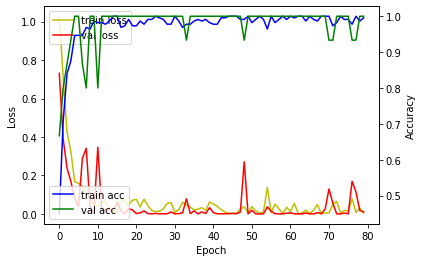

In [48]:
plot_accloss(history)